## Dataset
1. This data belongs to the Telecommunication Service i.e StormFiber subscription fees. We have different customer data to see whether they churn or not ?
2. Columns contains,gender,seniorCitizen ....

## Notes
1. <strike>We will remove customerId </strike>
2. We wil fix totalcharges dtype
3. 

## Steps 
1. <strike>Import Libraries</strike>
2. <strike>Install Relevant Libraries if those don't exists</strike>
3. <strike>Read the Data</strike>
4. EDA (Exploratory Data Analysis)
- - <strike>See Important Columns </strike>
   - <strike>Check Null values</strike>
   - <strike>Check Data Types</strike>
   - <strike>Check Correlation with the target column</strike>
   - <strike>Check If the class is balanced or not</strike>
   - <strike>Check if duplication exists</strike>
   - <strike>Check if data is sufficient to build anything</strike>
   - <strike>Check if the problem is classification or regression<strike>
   - <strike>Plot Data on Demographics<strike>
   - <strike>Plot Data on different features</strike>
   - Fetch relevant columns
     
6. Model Building
  -  <strike>If it is classification, use classification models such as LR, RandomFOrest, Decision,XGboost</strike>
  -  <strike>Evaluation of the model</strike>
  -  <strike>Confusion Matrix</strike>
  -  <strike>>Accuracy</strike
  -  <strike>Recall</strike>
  -  <strike>Precision</strike>
  -  F1 score

7. Save the Model in the Joblib file
8. Build a streamlit app 


## Install New Libraries

In [4]:
## This cell is reserved for installing new libraries


In [5]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


## Step 1 : Import Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from joblib import dump


## Step 2 : Read the File 

In [8]:
df = pd.read_csv("Telco_Customer_Churn.csv")

## Step 3 : EDA

#### Fetching List of columns / features

In [9]:
total_col = list(df.columns)
total_col
"""
 we will remove the customerID as it is of no use....
"""

'\n we will remove the customerID as it is of no use....\n'

In [10]:
total_col

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

### Listing important information from data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
"""
- Total CHarges have some kind of issues
"""

'\n- Total CHarges have some kind of issues\n'

In [14]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
for col in total_col:
    temp = df[
    (df[col].isnull()) | 
    (df[col]=='') | 
    (df[col]==' ')
    ]

    
    temp_rows = len(temp)
    print("Col {} contains {} empty rows".format(col,temp_rows))

Col customerID contains 0 empty rows
Col gender contains 0 empty rows
Col SeniorCitizen contains 0 empty rows
Col Partner contains 0 empty rows
Col Dependents contains 0 empty rows
Col tenure contains 0 empty rows
Col PhoneService contains 0 empty rows
Col MultipleLines contains 0 empty rows
Col InternetService contains 0 empty rows
Col OnlineSecurity contains 0 empty rows
Col OnlineBackup contains 0 empty rows
Col DeviceProtection contains 0 empty rows
Col TechSupport contains 0 empty rows
Col StreamingTV contains 0 empty rows
Col StreamingMovies contains 0 empty rows
Col Contract contains 0 empty rows
Col PaperlessBilling contains 0 empty rows
Col PaymentMethod contains 0 empty rows
Col MonthlyCharges contains 0 empty rows
Col TotalCharges contains 11 empty rows
Col Churn contains 0 empty rows


### Checking 11 rows of Total Charges 

In [16]:
temp = df[df['TotalCharges']==' ']

In [17]:
len(temp)

11

## Fixing Data Types

In [18]:
### IF a>b, True,False

In [19]:
df = df.drop(columns=['customerID'],axis=1)

In [20]:
df['TotalCharges'] = np.where(df['TotalCharges']==' ',None,df['TotalCharges'])

In [21]:
df['TotalCharges']  = df['TotalCharges'].astype(float)

In [22]:
df['Churn'] = np.where(df['Churn']=='No',0,1)

In [23]:
new_df = pd.get_dummies(df)

## Check Corrleation with target Column

In [24]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


<Axes: >

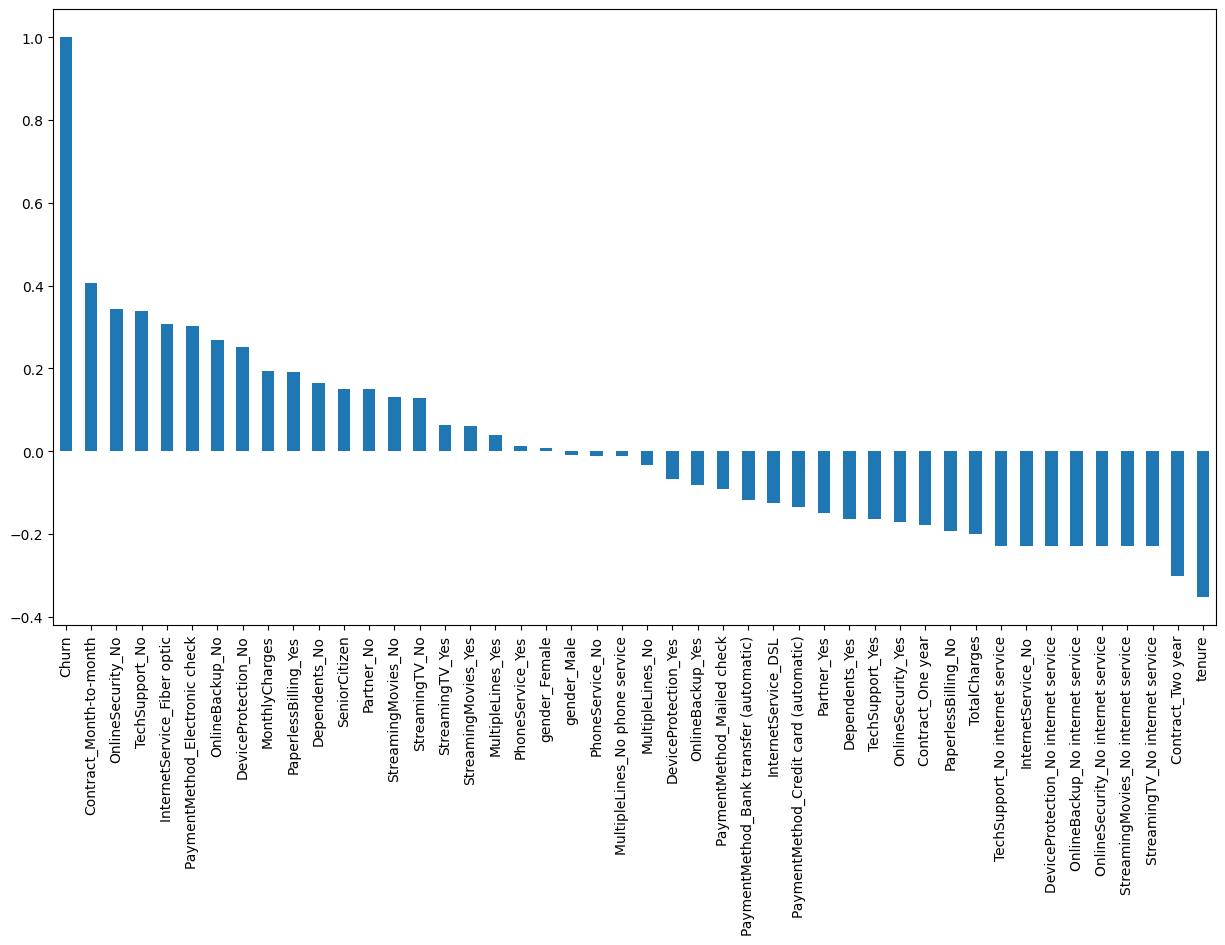

In [28]:
plt.figure(figsize=(15,8))
new_df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

## Data is balanced or not ?

In [30]:
balanced_df = new_df.groupby(['Churn']).count()['SeniorCitizen'].reset_index().rename(columns={'SeniorCitizen':'count_of_churn'})

<Axes: xlabel='Churn'>

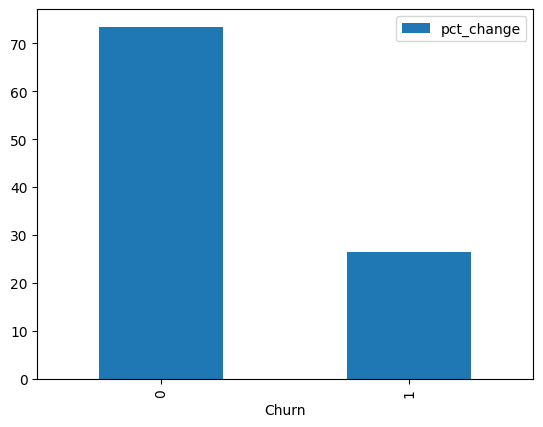

In [36]:
balanced_df.plot(x='Churn',y='pct_change',kind='bar')

In [37]:
balanced_df['total_rows'] = len(new_df)
balanced_df['pct_change'] = (balanced_df['count_of_churn']/balanced_df['total_rows'])*100

In [38]:
balanced_df

,Churn,count_of_churn,total_rows,pct_change
0,0,5174,7043,73.463013
1,1,1869,7043,26.536987


## If Duplication Exisits ? 

In [39]:
new_df = new_df.drop_duplicates()

"Yes duplication exists and we removed it "

## Problem category ?

1. It is a classifcation Problem

In [40]:
new_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,False,True,False,True,False,...,True,False,True,False,False,True,False,False,False,True
7039,0,72,103.20,7362.90,0,True,False,False,True,False,...,True,False,True,False,False,True,False,True,False,False
7040,0,11,29.60,346.45,0,True,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False
7041,1,4,74.40,306.60,1,False,True,False,True,True,...,False,True,False,False,False,True,False,False,False,True


## Plotting

## Demographics by Gender

In [41]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [42]:
df_gender = df.groupby(['gender']).count()['SeniorCitizen'].reset_index().rename(columns={'SeniorCitizen':'count_of_gender'})

In [43]:
df_gender['total_population'] = df_gender['count_of_gender'].sum()

In [44]:
df_gender['pct'] = (df_gender['count_of_gender']/df_gender['total_population'])*100

In [45]:
df_gender

,gender,count_of_gender,total_population,pct
0,Female,3488,7043,49.52435
1,Male,3555,7043,50.47565


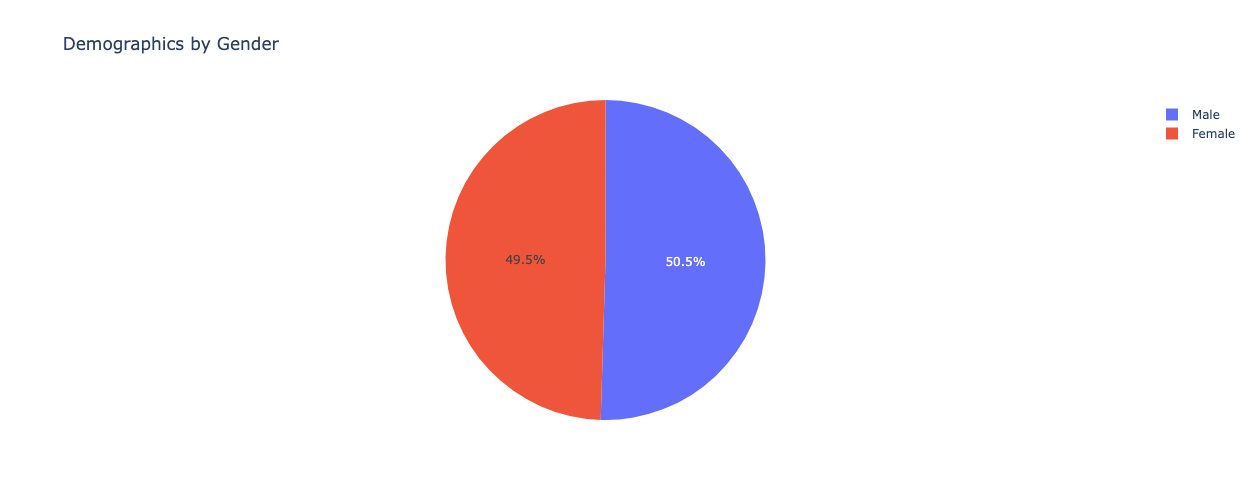

In [47]:

fig = px.pie(df_gender, values='pct', names='gender', title='Demographics by Gender')
fig.update_layout(
    autosize=False,
    width=500,
    height=500)

fig.show()



### Churn with respect to gender

In [48]:
df_gender_churn = df.groupby(['gender','Churn']).count()['SeniorCitizen'].reset_index().rename(columns={'SeniorCitizen':'count_of_gender'})

In [49]:
df_gender_churn['Churn'] = df_gender_churn['Churn'].astype(str)

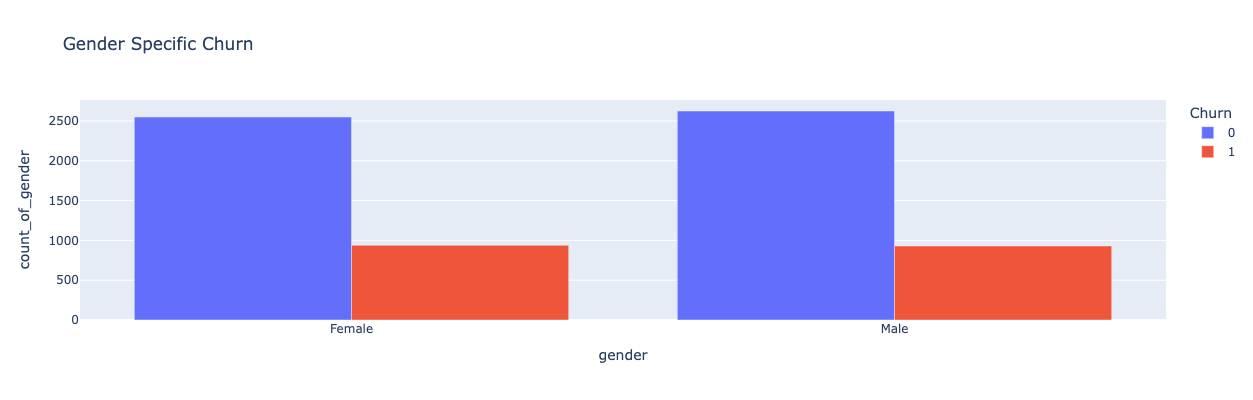

In [51]:
fig = px.bar(df_gender_churn, x="gender", y="count_of_gender",
             color='Churn', barmode='group',title='Gender Specific Churn',
             height=400)
fig.show()

In [145]:
## Demographics by Senior Citizen

In [52]:
df_sc = df.groupby(['SeniorCitizen']).count()['tenure'].reset_index().rename(columns={'tenure':'count_of_sc'})

In [53]:
df_sc['total_population'] = df_sc['count_of_sc'].sum()
df_sc['pct'] = (df_sc['count_of_sc']/df_sc['total_population'])*100

In [54]:
df_sc

,SeniorCitizen,count_of_sc,total_population,pct
0,0,5901,7043,83.785319
1,1,1142,7043,16.214681


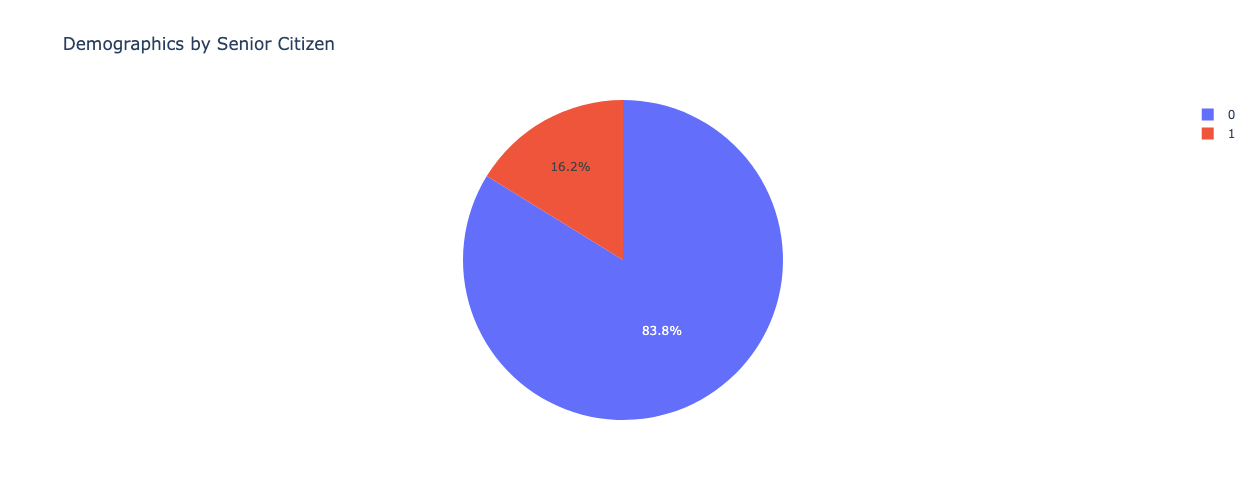

In [55]:

fig = px.pie(df_sc, values='pct', names='SeniorCitizen', title='Demographics by Senior Citizen')
fig.update_layout(
    autosize=False,
    width=500,
    height=500)

fig.show()



In [157]:
df_sc_churn = df.groupby(['SeniorCitizen','Churn']).count()['tenure'].reset_index().rename(columns={'tenure':'count_of_sc'})
df_sc_churn['total_population'] = df_sc_churn['count_of_sc'].sum()
df_sc_churn['pct'] = (df_sc_churn['count_of_sc']/df_sc_churn['total_population'])*100




In [158]:
df_sc_churn

,SeniorCitizen,Churn,count_of_sc,total_population,pct
0,0,0,4508,7043,64.006815
1,0,1,1393,7043,19.778503
2,1,0,666,7043,9.456198
3,1,1,476,7043,6.758484


In [181]:
new_df = new_df.dropna()

In [198]:
# We will use the data frame where we had created dummy variables

y = new_df['Churn'].values
X = new_df.drop(columns = ['Churn'])
X=X[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']]

# Scaling all the variables to a range of 0 to 1



features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [199]:
X.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [200]:
# Create Train & Test Data


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [201]:
# Running logistic regression model


model = LogisticRegression()
result = model.fit(X_train, y_train)

In [208]:
X_test

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
4789,0.0,0.746479,0.620398,0.494017
4047,0.0,0.126761,0.762189,0.107853
6110,0.0,0.014085,0.066169,0.003566
133,0.0,0.000000,0.171144,0.001921
4452,0.0,0.084507,0.262687,0.035045
...,...,...,...,...
896,0.0,0.154930,0.802488,0.127181
3521,0.0,0.887324,0.904975,0.775715
5179,1.0,0.647887,0.617910,0.439309
1270,0.0,0.760563,0.383582,0.356941


In [202]:
from sklearn import metrics
prediction_test = model.predict(X_test)

# Print the prediction accuracy

print (metrics.accuracy_score(y_test, prediction_test))

0.7993342843556823


In [203]:
metrics.confusion_matrix(y_test, prediction_test)

array([[1433,  117],
       [ 305,  248]])

In [204]:
TP = Actually = True ,Model = True
TN = Actually = False , Model = False
FP = Actually = False  , Model= True
FN = Actualy = True, Model = False

SyntaxError: cannot assign to True (3932932203.py, line 1)

In [ ]:
precision = TP / TP + FP

In [ ]:
Recal =  TP/TP+FN

In [ ]:
Model Predction CHurn1 =  100
Actully = 80 
FalsPositive = 100-80 =20

In [ ]:
Preciosn = Tp / TP +FP  = 80/80+20

In [ ]:
Accuracy = TP + TN / TOtal Observations

In [ ]:
Recall = 

In [ ]:
People who left = TP/TP + FN

In [ ]:
Problem CHurn = 1

In [ ]:
Model = TP/TP,FN

In [ ]:
Recall == TP / TP+FN

Axes(0.125,0.11;0.775x0.77)


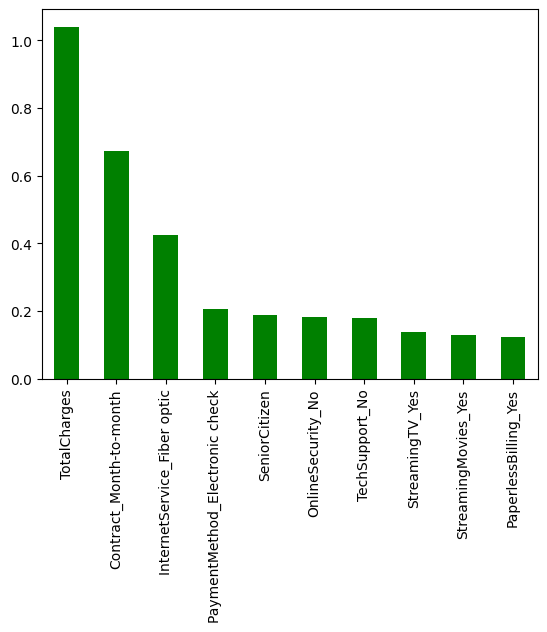

In [191]:
# To get the weights of all the variables

weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar', color = 'green'))

In [205]:
dump(model,'lg.joblib')

['lg.joblib']

In [206]:
X.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')